<h1>1. IMPORTING NESSASSARY LIBRARY

In [1]:
from google.colab import drive
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import math
from queue import PriorityQueue 
import heapq
%matplotlib inline

<h1>2. MOUNTING GDRIVE

In [2]:
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


<h1>3. IMPORTING DATA

DATA : South_Korea_airport_toy_example.csv

In [3]:
df = pd.read_csv('/content/drive/MyDrive/Algorithm_Team_Project1/South_Korea_airport_toy_example.csv')
df.head()

,Name,Type,IATA,ICAO,Longitude (deg),Latitude (deg)
0,Incheon,International,ICN,RKSI,126.4498,37.4465
1,Jeju,International,CJU,RKPC,126.4928,33.5111
2,Cheongju,International,CJJ,RKTU,127.4989,36.7164
3,Yangyang,International,YNY,RKNY,128.6689,38.0611
4,Pohang,Domestic,KPO,RKTH,129.4205,35.9879


<il>Name : Name of Airports
    
    
<il>Type : Whether International or Domestic
    
    
<il>IATA : Code Given by IATA
    
    
<il>ICAO : RK	South Korea (Republic of Korea)
    
    
<il>Longitude (deg) : Latitude of Airport
    
    
<il>Latitude (deg) : Longitude of Airport
    

<h1>4. CONSTRUCTING ADJACENCY LIST

In [4]:
print(df['Name'])
airports = [[1,2,3], [0,2,5],[0,1,4,5], [0,4], [2,3,5], [1,2,4]]
print(airports)

for i in range(len(airports)):
  print(f'Vertex {i} {df["Name"][i]}')
  for node in airports[i]:
    print(f'\t is connected to {node} {df["Name"][node]}')

0     Incheon
1        Jeju
2    Cheongju
3    Yangyang
4      Pohang
5      Gimhae
Name: Name, dtype: object
[[1, 2, 3], [0, 2, 5], [0, 1, 4, 5], [0, 4], [2, 3, 5], [1, 2, 4]]
Vertex 0 Incheon
	 is connected to 1 Jeju
	 is connected to 2 Cheongju
	 is connected to 3 Yangyang
Vertex 1 Jeju
	 is connected to 0 Incheon
	 is connected to 2 Cheongju
	 is connected to 5 Gimhae
Vertex 2 Cheongju
	 is connected to 0 Incheon
	 is connected to 1 Jeju
	 is connected to 4 Pohang
	 is connected to 5 Gimhae
Vertex 3 Yangyang
	 is connected to 0 Incheon
	 is connected to 4 Pohang
Vertex 4 Pohang
	 is connected to 2 Cheongju
	 is connected to 3 Yangyang
	 is connected to 5 Gimhae
Vertex 5 Gimhae
	 is connected to 1 Jeju
	 is connected to 2 Cheongju
	 is connected to 4 Pohang


<h1>5. IDEAL AIRPORTS ROUTE(DENSE)

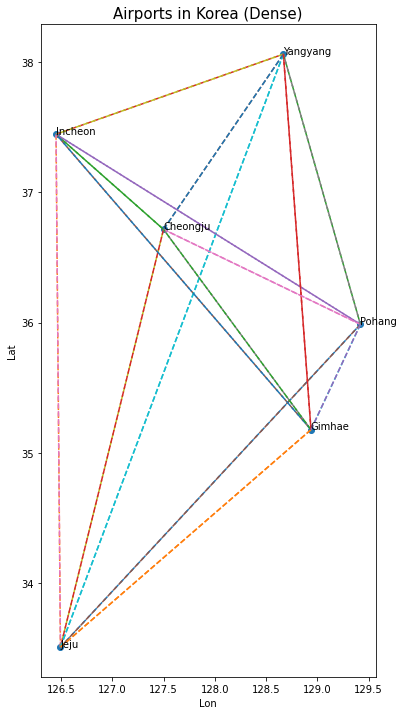

In [5]:
plt.figure(figsize= (6,12))
plt.scatter(df['Longitude (deg)'],df['Latitude (deg)'])
plt.xlabel("Lon")
plt.ylabel("Lat")
plt.title("Airports in Korea (Dense)",fontsize=15)
for i in range(len(df)):
    for j in range(len(df)):
        plt.plot([df['Longitude (deg)'][i],df['Longitude (deg)'][j]],[df['Latitude (deg)'][i],df['Latitude (deg)'][j]],'--')

for i,txt in enumerate(df['Name']):
    plt.annotate(txt, (df['Longitude (deg)'][i],df['Latitude (deg)'][i]))
plt.show()

<h1>6. CALCULATING DISTANCE BETWEEN AIRPORTS

Estimation of Weight of Edges : Haversine Formula
 - The haversine formula determines the great-circle distance between two points on a sphere given their longitudes and latitudes.
 -  Distance between two points are look like an arc in three dimension.


In [6]:
def GetDistByHaversine(x1, y1,x2, y2):
  radius = 6371
  toRad = math.pi/180
  lon_delta = abs(x1-x2) * toRad
  lat_delta = abs(y1-y2) * toRad
  sin_lat_del = math.sin(lat_delta / 2)
  sin_lon_del = math.sin(lon_delta / 2)
  sq = sin_lat_del * sin_lat_del + math.cos(x1* toRad) * math.cos(x2* toRad) * sin_lon_del * sin_lon_del
  distance = 2 * radius * math.asin(math.sqrt(sq))
  return distance

<h1>7. CONSTRUCTING CURRENT AIRPORT ROUTES WITH DISTANCE 
<h2>IN FINE WEATHER CONDITION

In [7]:
def FineCond_Graph_Construct(df):
  plt.figure(figsize= (6,12))
  plt.scatter(df['Longitude (deg)'],df['Latitude (deg)'])
  plt.xlabel("Lonitude (deg)")
  plt.ylabel("Latatitude (deg)")
  plt.title("Airports in Korea",fontsize=15)

  ls = []
  air =[[] for _ in range(len(airports))]

  for i in range(len(df)):
      for p in airports[i]:
          plt.plot([df['Longitude (deg)'][i],df['Longitude (deg)'][p]],[df['Latitude (deg)'][i],df['Latitude (deg)'][p]],'--')
          
  for i in range(len(df)):
      for p in airports[i]:
          d = GetDistByHaversine(df['Longitude (deg)'][i],df['Latitude (deg)'][i],df['Longitude (deg)'][p],df['Latitude (deg)'][p])
          air[i].append((p,d))
          if((df['Name'][i],df['Name'][p]) in ls or (df['Name'][p],df['Name'][i]) in ls): continue
          else : ls.append((df['Name'][i],df['Name'][p]))

          plt.annotate(round(d,2), ((df['Longitude (deg)'][i]+df['Longitude (deg)'][p])/2,(df['Latitude (deg)'][i]+df['Latitude (deg)'][p])/2))

  for i,txt in enumerate(df['Name']):
      plt.annotate(txt, (df['Longitude (deg)'][i],df['Latitude (deg)'][i]))
  plt.show()
  return air

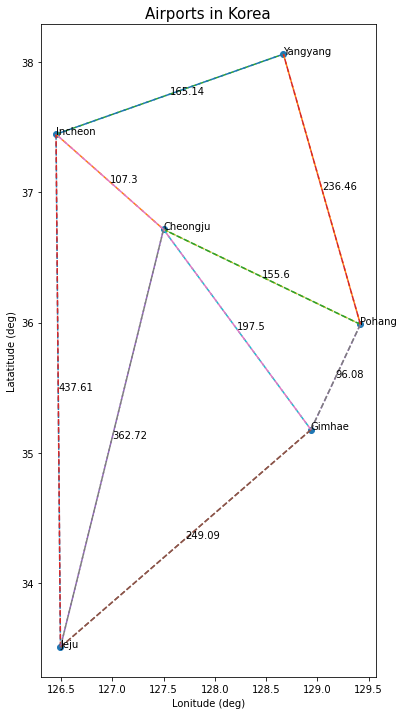

In [8]:
airports_route_fine_condition = FineCond_Graph_Construct(df)

<h1>8. Constructing Graph Node, Vertex and Dijkstra method

In [9]:
class Graph:
    def __init__(self, num_of_vertices):
        self.v = num_of_vertices
        self.edges = [[-1 for i in range(num_of_vertices)] for j in range(num_of_vertices)]
        self.visited = [-1 for _ in range(num_of_vertices)]
        self.E = [[] for _ in range(num_of_vertices)]

    def add_edge(self, u, v, weight):
        self.edges[u][v] = weight
        self.edges[v][u] = weight
        self.E[u].append((v,weight))
        self.E[v].append((u,weight))


    def dijkstra(self, start_vertex):
        D = {v:float('inf') for v in range(self.v)} #list of D in the size v created and entire list is initalized to infinity and is the list where we keep the shortest paths from start_vertex to all other nodes
        D[start_vertex] = 0 #start vertex is 0
        
        pq = PriorityQueue() #to sort the vertices from least to most distant
        pq.put((0, start_vertex))
        while not pq.empty():
            (dist, current_vertex) = pq.get()
            #self.visited.append(current_vertex)
            
            for neighbor in range(self.v):
                if self.edges[current_vertex][neighbor] != -1:
                    distance = self.edges[current_vertex][neighbor]
                    if neighbor not in self.visited:
                        old_cost = D[neighbor] #if neighbor is not visited, we will compare its old cost and its new cost
                        new_cost = D[current_vertex] + distance
                    #the old cost is the current value of shortest path from the start vertext to the neighbor
                    #the new cost is the value of the sum of the shortest path from the start vertext to the current vertex 
                        if new_cost < old_cost:
                            self.visited[neighbor] = current_vertex
                            pq.put((new_cost, neighbor))
                            D[neighbor] = new_cost #if the new cost is lower than the old cost, we put the neighbor and its cost to the priority queue, and update the lists where we keep the shortest paths accordingly
        
        return D #after all the vertices are visited and the priority queue is empty, we return the list

    def shortest(self, start):    
        INF = 10**10
        D = [INF]*(self.v)
        D[start] = 0
        q = []
        heapq.heappush(q, (0,start))
        while(q):
            dist, curr = heapq.heappop(q)
            if(D[curr]<dist): continue
            for v,w in self.E[curr]:
                cost = w+dist
                if(cost<D[v]):
                    D[v] = cost
                    self.visited[v] = curr

                    heapq.heappush(q, (cost,v))
        return D
        #v number of vertices in graph
        #edges list of edges for nodes u and v
        #self.edges u v is the weight of the edge
        #visited is the set that contains visited vertices

In [10]:
def FindPath(df, g, start,end):
  vertex = end
  stack =[vertex]
  airports = []
  while(True):
    vertex = g.visited[vertex]
    stack.append(vertex)
    if(vertex==start) : break
  for ports in reversed(stack): airports.append(df['Name'][ports])
  return airports

<h1>9. SHORTEST PATH IN FINE CONDITION

In [11]:
fine_graph = Graph(6)
for i in range(len(airports_route_fine_condition)):
  for node,dist in airports_route_fine_condition[i]:
    fine_graph.add_edge(i, node, dist)

In [12]:
D = fine_graph.dijkstra(1)
print(D)

{0: 437.6057512261999, 1: 0, 2: 362.7170702500725, 3: 581.6342349037137, 4: 345.1694341288975, 5: 249.09373510724782}


In [13]:
#print(fine_graph.visited)
route = FindPath(df,fine_graph,1,3)
print(route)

['Jeju', 'Gimhae', 'Pohang', 'Yangyang']


In [14]:
#(1: JEJU) TO (3: YANGYANG)      : 581.63 km  is the shortest path

<h1>10. AREA OF SEVERE WEATHER CONDITION

In [15]:
Polygon_information = ([(128.7, 36.6), (128.7, 37.6), (129.3, 37.6), (129.3, 36.6)])

'''
x_ls = []
y_ls = []
for coor_tuple in Polygon_information:
   x,y = coor_tuple
   x_ls.append(x)
   y_ls.append(y)
'''
def get_poly_data(Polygon_information):
  x_ls = []
  y_ls = []
  for coor_tuple in Polygon_information:
    x,y = coor_tuple
    x_ls.append(x)
    y_ls.append(y)
  return x_ls,y_ls

<h1>11. CHECKING WHETHER EDGE IN SEVERE CONDITION

In [16]:
def isPathInSevereCond(x_ls,y_ls, route_x, route_y):  # to find intersaction between path and bad weather
  mn_x, mx_x =  min(x_ls),max(x_ls)
  mn_y, mx_y =  min(y_ls),max(y_ls)

  route_x_s,route_x_e = min(route_x), max(route_x)
  route_y_s,route_y_e = min(route_y), max(route_y)

  for i in (np.arange(route_x_s,route_x_e,0.01)):
      y_val = round(((route_y[1] - route_y[0])/(route_x[1] - route_x[0]))*(i-route_x[0]) + route_y[0],4)
      if(mn_x<=i and i<=mx_x):
        if(mn_y<=y_val and y_val<=mx_y): return True
  return False

<h1>12. CONSTRUCTING CURRENT AIRPORT ROUTES WITH DISTANCE
<h2>IN SEVERE WEATHER CONDITION

In [17]:
def SevereCond_Graph_Construct(df, Polygon_information):
  plt.figure(figsize= (6,12))
  plt.scatter(df['Longitude (deg)'],df['Latitude (deg)'])
  plt.xlabel("Lonitude (deg)")
  plt.ylabel("Latatitude (deg)")
  plt.title("Airports in Korea",fontsize=15)

  x_ls,y_ls = get_poly_data(Polygon_information)
  ls= []
  air =[[] for _ in range(len(airports))]
  INF = 10**5
  for i in range(len(df)):
      for p in airports[i]:
          route_x = [df['Longitude (deg)'][i],df['Longitude (deg)'][p]]
          route_y = [df['Latitude (deg)'][i],df['Latitude (deg)'][p]]
          if((df['Name'][i],df['Name'][p]) in ls or (df['Name'][p],df['Name'][i]) in ls): continue
          else : ls.append((df['Name'][i],df['Name'][p]))
          plt.plot(route_x,route_y,'--')
  ls= []        
  for i in range(len(df)):
      for p in airports[i]:
          route_x = [df['Longitude (deg)'][i],df['Longitude (deg)'][p]]
          route_y = [df['Latitude (deg)'][i],df['Latitude (deg)'][p]]
          d = GetDistByHaversine(df['Longitude (deg)'][i],df['Latitude (deg)'][i],df['Longitude (deg)'][p],df['Latitude (deg)'][p])
          if(isPathInSevereCond(x_ls,y_ls, route_x, route_y)): d=INF
          air[i].append((p,d))
          if((df['Name'][i],df['Name'][p]) in ls or (df['Name'][p],df['Name'][i]) in ls): continue
          else : ls.append((df['Name'][i],df['Name'][p]))
          
          if(d==INF): plt.annotate('INF', ((df['Longitude (deg)'][i]+df['Longitude (deg)'][p])/2,(df['Latitude (deg)'][i]+df['Latitude (deg)'][p])/2))
          else : plt.annotate(round(d,2), ((df['Longitude (deg)'][i]+df['Longitude (deg)'][p])/2,(df['Latitude (deg)'][i]+df['Latitude (deg)'][p])/2))

  for i,txt in enumerate(df['Name']):
      plt.annotate(txt, (df['Longitude (deg)'][i],df['Latitude (deg)'][i]))

  plt.fill(x_ls,y_ls)

  plt.show()
  return air

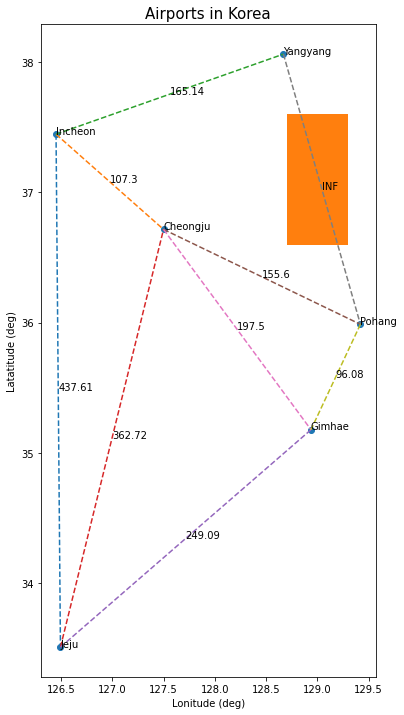

In [18]:
airports_route_severe_condition = SevereCond_Graph_Construct(df,Polygon_information)

In [19]:
airports_route_severe_condition

[[(1, 437.6057512261999), (2, 107.2961641015252), (3, 165.140155277728)],
 [(0, 437.6057512261999), (2, 362.7170702500725), (5, 249.09373510724782)],
 [(0, 107.2961641015252),
  (1, 362.7170702500725),
  (4, 155.59552979237537),
  (5, 197.50439916214103)],
 [(0, 165.140155277728), (4, 100000)],
 [(2, 155.59552979237537), (3, 100000), (5, 96.07569902164968)],
 [(1, 249.09373510724782), (2, 197.50439916214103), (4, 96.07569902164968)]]

<h1>13. SHORTEST PATH IN SEVERE CONDITION

In [20]:
severe_graph = Graph(6)
for i in range(len(airports_route_severe_condition)):
  for node,dist in airports_route_severe_condition[i]:
    severe_graph.add_edge(i, node, dist)

In [21]:
D = severe_graph.dijkstra(1)
print(D)

{0: 437.6057512261999, 1: 0, 2: 362.7170702500725, 3: 602.7459065039279, 4: 345.1694341288975, 5: 249.09373510724782}


In [22]:
route = FindPath(df, severe_graph,1,3)
print(route)

['Jeju', 'Incheon', 'Yangyang']


<h1>14. RESULT IN OTHER SEVERE CONDITION

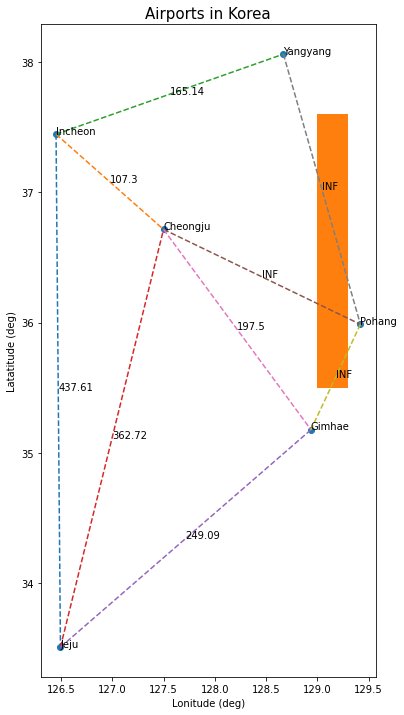

{0: 437.6057512261999, 1: 0, 2: 362.7170702500725, 3: 602.7459065039279, 4: 100249.09373510725, 5: 249.09373510724782}
['Jeju', 'Incheon', 'Yangyang']


In [23]:
Severe_cond1 = ([(129.0, 35.5), (129.0, 37.6), (129.3, 37.6), (129.3, 35.5)])
cond1_routes = SevereCond_Graph_Construct(df,Severe_cond1)
severe_cond1_graph = Graph(6)
for i in range(len(cond1_routes)):
  for node,dist in cond1_routes[i]:
    #print(f'{df["Name"][i]} to {df["Name"][node]} {dist}')
    severe_cond1_graph.add_edge(i, node, dist)
D = severe_cond1_graph.dijkstra(1)
print(D)
route = FindPath(df, severe_cond1_graph,1,3)
print(route)

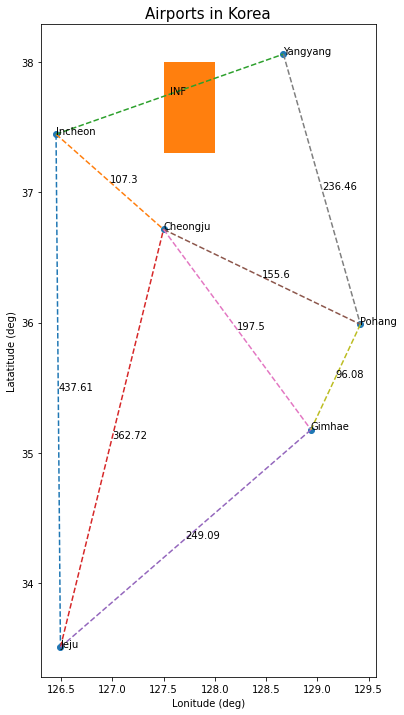

{0: 437.6057512261999, 1: 0, 2: 362.7170702500725, 3: 581.6342349037137, 4: 345.1694341288975, 5: 249.09373510724782}
['Jeju', 'Gimhae', 'Pohang', 'Yangyang']


In [24]:
Severe_cond2 = ([(127.5, 37.3), (127.5, 38.0), (128.0, 38.0), (128.0, 37.3)])
cond2_routes = SevereCond_Graph_Construct(df,Severe_cond2)
severe_cond2_graph = Graph(6)
for i in range(len(cond2_routes)):
  for node,dist in cond2_routes[i]:
    severe_cond2_graph.add_edge(i, node, dist)
D = severe_cond2_graph.dijkstra(1)
print(D)
route = FindPath(df, severe_cond2_graph,1,3)
print(route)